<a href="https://colab.research.google.com/github/saisaran850/Projects/blob/main/Marketing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# STEP 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [10]:
# Step2 : Loading the Training Dataset
df1=pd.read_csv('/content/Train_psolI3n.csv')
df1

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [11]:
# Step 3: Identify numeric and categorical columns
numeric_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

# Step 4: Fill missing values
# Fill numeric columns with median
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].median())

# Fill categorical columns with mode
for col in categorical_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

# STEP 5: Confirm all missing values are handled
print("Remaining missing values:", df1.isnull().sum().sum())

Remaining missing values: 0


In [12]:
# Step 6: CTR & Conversion Rate
total_emails = len(df1)
clicked_emails = df1['Email_Status'].sum()

ctr = (clicked_emails / total_emails) * 100
conversion_rate = ctr  # Using Email_Status=1 as conversion

print(f"Click-Through Rate (CTR): {ctr:.2f}%")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Click-Through Rate (CTR): 23.09%
Conversion Rate: 23.09%


In [13]:
# Step 7: Engagement Score for ROI Proxy
avg_word_count = df1.loc[df1['Email_Status'] == 1, 'Word_Count'].mean()
avg_links = df1.loc[df1['Email_Status'] == 1, 'Total_Links'].mean()
avg_images = df1.loc[df1['Email_Status'] == 1, 'Total_Images'].mean()

In [14]:
# Weighted engagement score
engagement_score = 0.5 * avg_word_count + 2 * avg_links + 3 * avg_images

In [15]:
# Proxy ROI
proxy_roi = ctr * engagement_score

print(f"Average Engagement Score: {engagement_score:.2f}")
print(f"Proxy ROI: {proxy_roi:.2f}")

Average Engagement Score: 324.44
Proxy ROI: 7492.50


In [16]:
# AUDIENCE SEGMENTATION USING PYTHON
# Step 8: Select Features for Segmentation
features = ['Subject_Hotness_Score', 'Word_Count', 'Total_Links',
            'Total_Images', 'Total_Past_Communications']

X = df1[features]

In [17]:
# Step 9: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

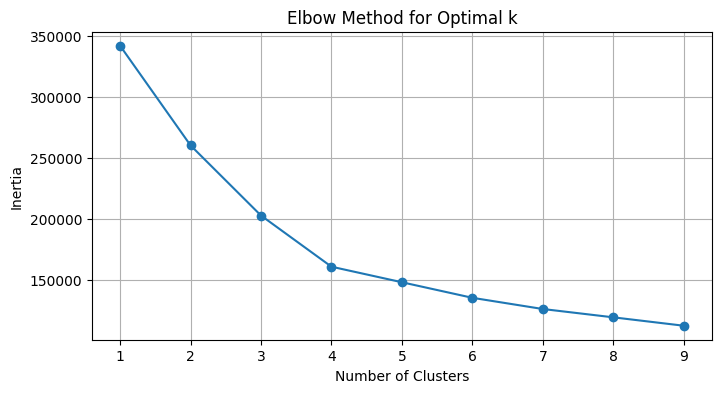

In [18]:
# Step 10: Determine Optimal Number of Clusters (Elbow Method)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [20]:
# Step 11: Apply KMeans Clustering (Choose k based on elbow plot, e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Segment'] = kmeans.fit_predict(X_scaled)
df1['Segment']

,Segment
0,1
1,1
2,2
3,1
4,1
...,...
68348,0
68349,0
68350,1
68351,2


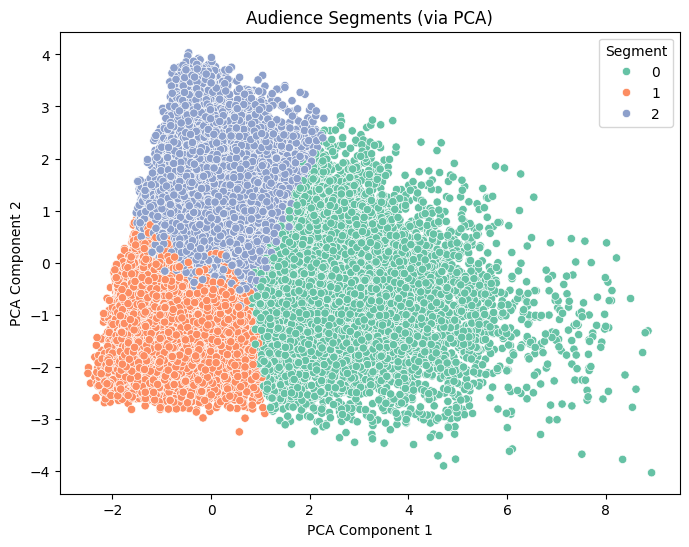

In [22]:
# Step 12: Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df1['Segment'], palette='Set2')
plt.title('Audience Segments (via PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Segment')
plt.show()